# Effect of formal meetings on model oucomes over time

In [1]:
# import all necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_style('white')
sns.set_context('talk')

In [2]:
os.getcwd()

'C:\\Users\\frac1\\Documents\\GitHub\\SEN9120-Regional energy transition'

In [3]:
validation = pd.read_csv(".\\validation_results\\Model_outcomes_with_and_without_formal_meetings-table.csv", skiprows=6)
validation

,[run number],random-seed,green-energy-openness-change,random-intial-trust,informal-meetings-frequency,show-externalities,total-project-proposal-frequency,show-municipal-decisions,administrative-network-meetings,max-project-capacity,...,end-year,enable-formal-meetings,[step],current-wind-production,current-solar-production,current-urban-production,count project-connections with [owner = True],count projects with [active = True],projects-rejected,regional-trust
0,6,0,-5,False,12,False,12,False,12,12,...,2050,False,0,0,0,0.0,0,0,0,0.000000
1,7,0,0,False,12,False,12,False,12,12,...,2050,True,0,0,0,0.0,0,0,0,0.000000
2,4,0,-5,False,12,False,12,False,12,12,...,2050,False,0,0,0,0.0,0,0,0,0.000000
3,3,0,-5,False,12,False,12,False,12,12,...,2050,True,0,0,0,0.0,0,0,0,0.000000
4,1,0,-5,False,12,False,12,False,12,12,...,2050,True,0,0,0,0.0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38983,107,5,5,False,12,False,12,False,12,12,...,2050,True,356,205,779,319.5,323,285,666,47.264715
38984,107,5,5,False,12,False,12,False,12,12,...,2050,True,357,205,809,322.5,324,289,669,47.259980
38985,107,5,5,False,12,False,12,False,12,12,...,2050,True,358,205,809,325.5,329,291,670,47.288714
38986,107,5,5,False,12,False,12,False,12,12,...,2050,True,359,205,809,325.5,337,291,674,47.341793


In [7]:
#rename the column headers
data = validation.rename(columns={"[step]":"step", "[run number]":"run number", "count project-connections with [owner = True]":"accepted projects", "count projects with [active = True]":"active projects", "projects-rejected":"rejected projects"})
data = data.iloc[:, np.r_[0:3,13, 15:24] ]
data.columns = data.columns.str.replace("-"," ")

#add a totals column for REIPs' overall installed power
data["Total MW implemented"] = data.iloc[:, 6:9].sum(axis=1)
data

,run number,random seed,green energy openness change,political variety change,enable formal meetings,step,current wind production,current solar production,current urban production,accepted projects,active projects,rejected projects,regional trust,Total MW implemented
0,6,0,-5,5,False,0,0,0,0.0,0,0,0,0.000000,0.0
1,7,0,0,-5,True,0,0,0,0.0,0,0,0,0.000000,0.0
2,4,0,-5,0,False,0,0,0,0.0,0,0,0,0.000000,0.0
3,3,0,-5,0,True,0,0,0,0.0,0,0,0,0.000000,0.0
4,1,0,-5,-5,True,0,0,0,0.0,0,0,0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38983,107,5,5,5,True,356,205,779,319.5,323,285,666,47.264715,1303.5
38984,107,5,5,5,True,357,205,809,322.5,324,289,669,47.259980,1336.5
38985,107,5,5,5,True,358,205,809,325.5,329,291,670,47.288714,1339.5
38986,107,5,5,5,True,359,205,809,325.5,337,291,674,47.341793,1339.5


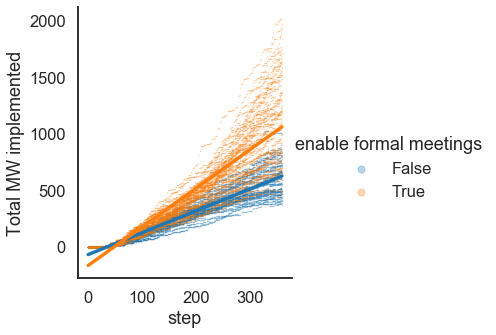

In [22]:
g = sns.lmplot('step', "Total MW implemented", data=data, hue='enable formal meetings', scatter_kws={"s": .1, 'alpha':0.3}, fit_reg=True)

for lh in g._legend.legendHandles: 
    lh._sizes = [50]
    
# save figure
plt.savefig("./Graphs/Effect_of_formal_meetings.png") 

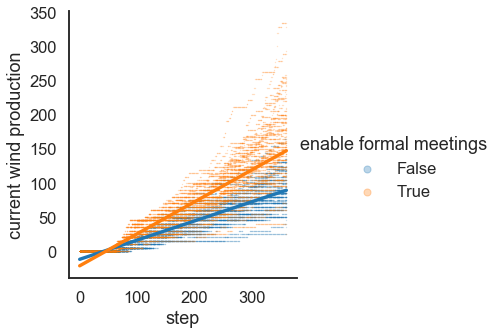

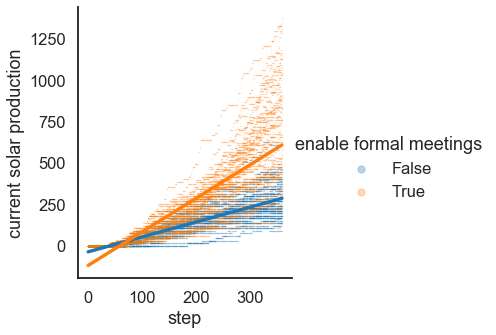

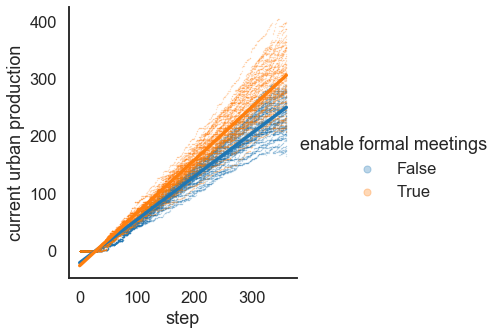

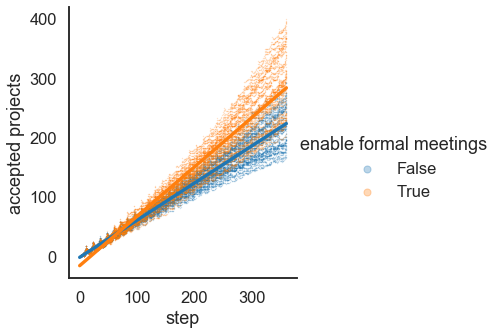

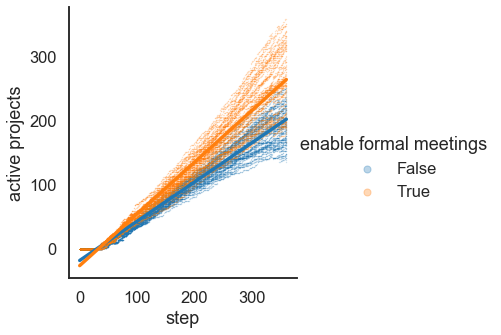

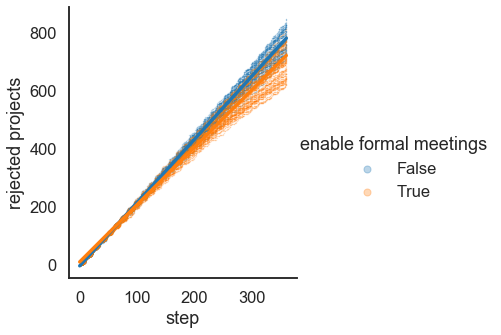

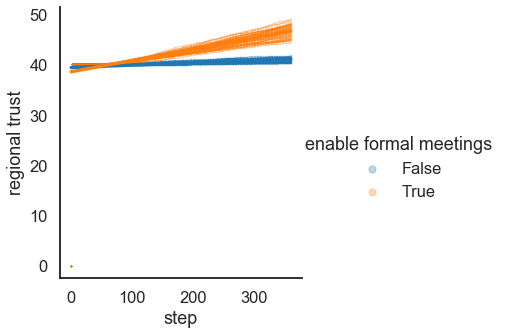

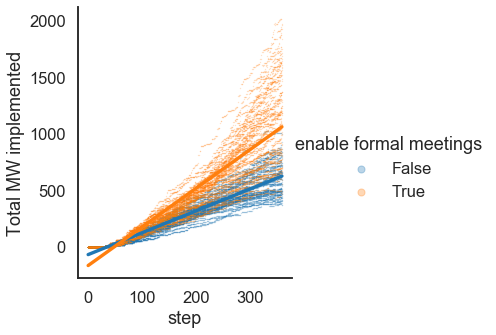

In [24]:
for i in data.columns[6:]:
    i = str(i)
    g = sns.lmplot('step', i, data=data, hue='enable formal meetings', scatter_kws={"s": .1, 'alpha':0.3}, fit_reg=True)

    for lh in g._legend.legendHandles: 
        lh._sizes = [50] 
    plt.savefig("./Graphs/Effect_of_"+ i +".png")
    plt.show()
    